# Class CNN Definition

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Transposed Convolution Layer
        self.tconv1 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, stride=2)
        self.tconv2 = nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=2, stride=2)

        # Fully connected layer
        # After two pooling layers, the image size is reduced to 7x7
        self.fc = nn.Linear(in_features=16*7*7, out_features=10)

    def forward(self, x, show=True):
        if show:
            print(f'Input {x.shape}')
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        if show:
            print(f'After 1st pool {x.shape}')
            self.x_1 = x

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        if show:
            print(f'After 2nd pool {x.shape}')
            self.x_2 = x

        # Upsample the feature map before passing it to the fully connected layer
        x = self.tconv1(x)
        x = F.relu(x)
        if show:
            print(f'After transpose convolution {x.shape}')
            self.x_3 = x
        
        x = self.tconv2(x)
        x = F.relu(x)
        if show:
            print(f'After second transpose convolution {x.shape}')
            self.x_4 = x

        # Flatten the tensor for the fully connected layer
        x = x.view(-1, 16*7*7)
        x = self.fc(x)
        self.x_5 = x
        return x

# Testing of basic stuff

In [2]:
import torchvision
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images to [-1, 1]
])

In [4]:
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

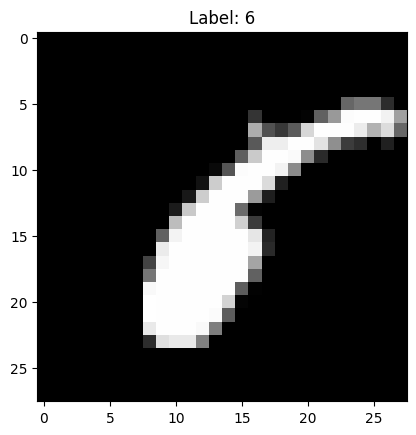

In [6]:
import matplotlib.pyplot as plt

# Get a single batch of images
images, labels = next(iter(train_loader))

# Visualize the first image in the batch
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()

In [7]:
Test_Image = images[0].unsqueeze(1)

In [8]:
images.shape

torch.Size([32, 1, 28, 28])

In [9]:
Test_Image.shape

torch.Size([1, 1, 28, 28])

In [10]:
model = MNIST_CNN()

In [11]:
output = model.forward(Test_Image)

Input torch.Size([1, 1, 28, 28])
After 1st pool torch.Size([1, 16, 14, 14])
After 2nd pool torch.Size([1, 32, 7, 7])
After transpose convolution torch.Size([1, 16, 14, 14])
After second transpose convolution torch.Size([1, 1, 28, 28])


In [12]:
output.shape

torch.Size([1, 10])

In [13]:
# Visualize the first image in the batch
#plt.imshow(output[0].squeeze().detach().numpy() , cmap='gray')
#plt.title(f'Label: {labels[0]}')
#plt.show()
output[0].squeeze().detach().numpy()

array([-0.01724716,  0.34685868, -0.05771452,  0.01312018,  0.15056135,
       -0.08066823,  0.27245307,  0.3857359 ,  0.149295  ,  0.28089058],
      dtype=float32)

In [14]:
output

tensor([[-0.0172,  0.3469, -0.0577,  0.0131,  0.1506, -0.0807,  0.2725,  0.3857,
          0.1493,  0.2809]], grad_fn=<AddmmBackward0>)

In [15]:
x_1 = model.x_1.detach()

In [16]:
x_1_c_1 = x_1[0,2,:,:]

In [17]:

x_1_c_1 = x_1_c_1.numpy()


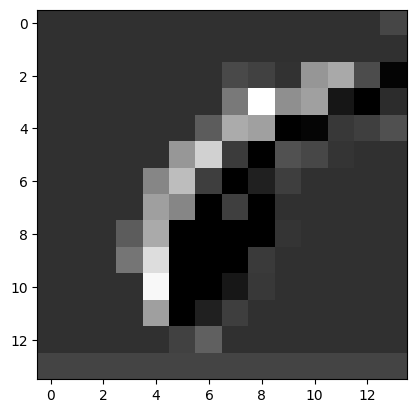

In [18]:
# Visualize the first image in the batch
plt.imshow(x_1_c_1, cmap='gray')
plt.show()

In [19]:
import numpy as np
image = np.zeros((14, 14))
for idx in range(16):
    image = image + x_1[0,idx,:,:].numpy()

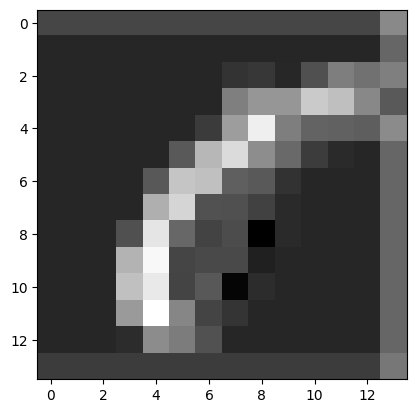

In [20]:
# Visualize the first image in the batch
plt.imshow(image, cmap='gray')
plt.show()

In [21]:
x_4 = model.x_4.detach()

In [22]:
x_4.shape

torch.Size([1, 1, 28, 28])

In [23]:
x_4_c_1 = x_4[0,0,:,:]

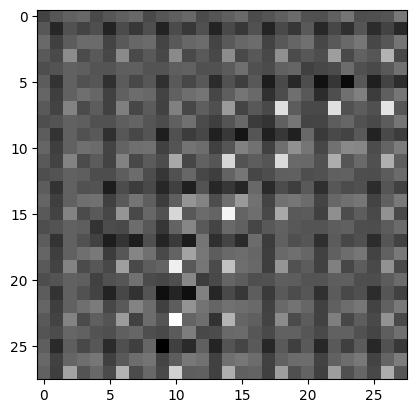

In [24]:
# Visualize the first image in the batch
plt.imshow(x_4_c_1, cmap='gray')
plt.show()

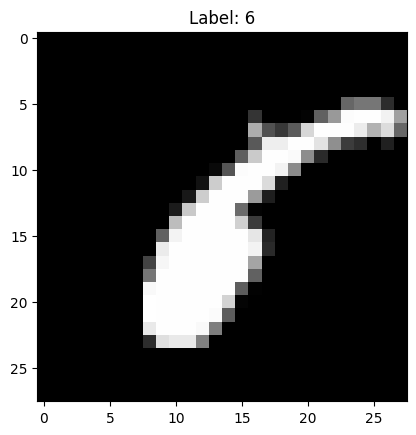

In [25]:
# Visualize the first image in the batch
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()

# Train

In [26]:

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Define the transformation to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class MNIST_CNN_TRAIN(nn.Module):
    def __init__(self):
        super(MNIST_CNN_TRAIN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Transposed Convolution Layer
        self.tconv1 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, stride=2)
        self.tconv2 = nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=2, stride=2)

        # Fully connected layer
        # After two pooling layers, the image size is reduced to 7x7
        self.fc = nn.Linear(in_features=16*7*7, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Upsample the feature map before passing it to the fully connected layer
        x = self.tconv1(x)
        x = F.relu(x)
        
        x = self.tconv2(x)
        x = F.relu(x)

        # Flatten the tensor for the fully connected layer
        x = x.view(-1, 16*7*7)
        x = self.fc(x)
        self.x_5 = x
        return x

In [28]:
model = MNIST_CNN_TRAIN()

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


[1,   100] loss: 1.487
[1,   200] loss: 0.402
[1,   300] loss: 0.262
[1,   400] loss: 0.162
[1,   500] loss: 0.138
[1,   600] loss: 0.107
[1,   700] loss: 0.114
[1,   800] loss: 0.110
[1,   900] loss: 0.091
[2,   100] loss: 0.084
[2,   200] loss: 0.080
[2,   300] loss: 0.077
[2,   400] loss: 0.070
[2,   500] loss: 0.068
[2,   600] loss: 0.066
[2,   700] loss: 0.070
[2,   800] loss: 0.068
[2,   900] loss: 0.071
[3,   100] loss: 0.057
[3,   200] loss: 0.058
[3,   300] loss: 0.055
[3,   400] loss: 0.062
[3,   500] loss: 0.056
[3,   600] loss: 0.060
[3,   700] loss: 0.051
[3,   800] loss: 0.049
[3,   900] loss: 0.057
[4,   100] loss: 0.044
[4,   200] loss: 0.054
[4,   300] loss: 0.049
[4,   400] loss: 0.050
[4,   500] loss: 0.057
[4,   600] loss: 0.046
[4,   700] loss: 0.044
[4,   800] loss: 0.040
[4,   900] loss: 0.043
[5,   100] loss: 0.036
[5,   200] loss: 0.038
[5,   300] loss: 0.042
[5,   400] loss: 0.039
[5,   500] loss: 0.043
[5,   600] loss: 0.047
[5,   700] loss: 0.047
[5,   800] 

In [30]:
model(Test_Image)

tensor([[ -2.4210, -10.1726, -14.1140, -10.9512,  -0.6555,   1.9432,   5.1296,
         -10.5925,   2.9211,  -8.0372]], grad_fn=<AddmmBackward0>)

In [31]:
from torchviz import make_dot

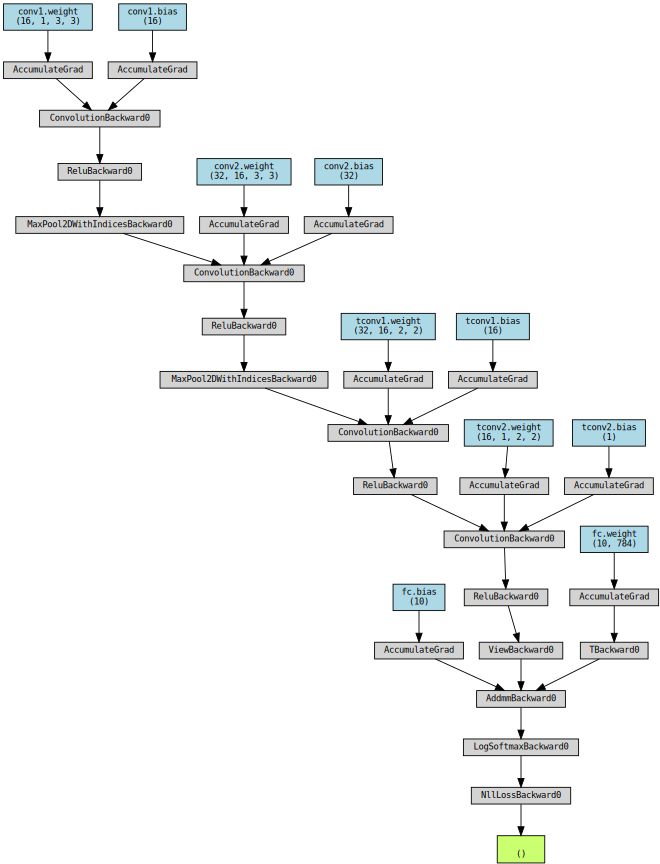

In [32]:
make_dot(loss, params=dict(model.named_parameters()))